In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import glob
import os
import random
import datetime
import re
import json

In [5]:
topology_metadata = dict(
    id="topology_001",
    omega=nx.smallworld.omega(graphs[0]),
    network=nx.node_link_data(graphs[0])
)
topology_metadata

NameError: name 'graphs' is not defined

Initializing source files...
Opened moralnet config.yml
Value of omega: 0.5708253897050575
wrote studies/moralnet/topology_007/metadata.json to file


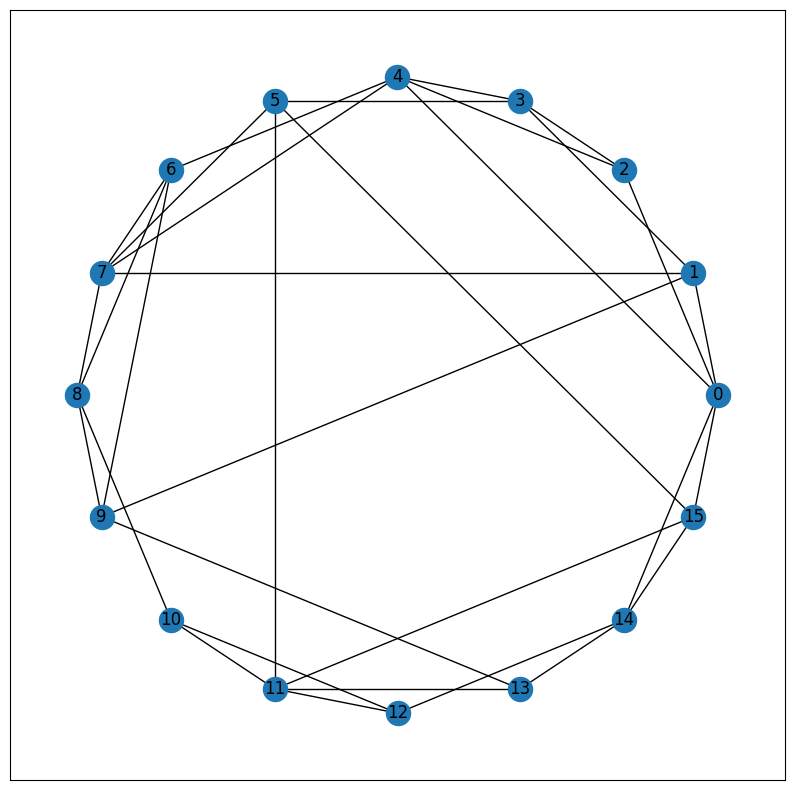

In [1]:
from src import generate

graphs = generate("moralnet", test=False, write=True)

In [5]:
nx.smallworld.omega(graphs[0])

0.5059128630705392

In [81]:
from copy import deepcopy
nodes = list(graphs[0].nodes())
edge_map = { node: set(edge_map[node]) for node in deepcopy(nx.to_dict_of_lists(graphs[0])) }

edge_map

{0: {1, 2, 7, 14},
 1: {0, 3, 7, 15},
 2: {0, 3, 4},
 3: {1, 2, 5, 13},
 4: {2, 5, 6},
 5: {3, 4, 6, 15},
 6: {4, 5, 7, 8},
 7: {0, 1, 6, 9},
 8: {6, 9, 10, 11, 12},
 9: {7, 8, 10, 11, 15},
 10: {8, 9, 11, 12},
 11: {8, 9, 10, 13},
 12: {8, 10, 14},
 13: {3, 11, 14, 15},
 14: {0, 12, 13, 15},
 15: {1, 5, 9, 13, 14}}

In [82]:
nodes_in_round = set()
edges_in_round = list()

for node, others in edge_map.items():

    if node in nodes_in_round:
        continue

    available_others = others.difference(nodes_in_round)
    if len(available_others) == 0:
        print(f"Node {node} has no available others to pair with")
        continue
    
    paired_other = random.choice(tuple(available_others))

    nodes_in_round.update([node, paired_other])
    edges_in_round.append([node, paired_other])
    

In [83]:
edges_in_round

[[0, 1], [2, 3], [4, 6], [5, 15], [7, 9], [8, 10], [11, 13], [12, 14]]

In [83]:
nx.node_link_data(graphs[0])

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9},
  {'id': 10},
  {'id': 11},
  {'id': 12},
  {'id': 13},
  {'id': 14},
  {'id': 15}],
 'links': [{'source': 0, 'target': 1},
  {'source': 0, 'target': 15},
  {'source': 0, 'target': 14},
  {'source': 0, 'target': 12},
  {'source': 0, 'target': 7},
  {'source': 1, 'target': 2},
  {'source': 1, 'target': 3},
  {'source': 1, 'target': 15},
  {'source': 2, 'target': 3},
  {'source': 2, 'target': 4},
  {'source': 3, 'target': 4},
  {'source': 3, 'target': 5},
  {'source': 3, 'target': 6},
  {'source': 3, 'target': 11},
  {'source': 4, 'target': 6},
  {'source': 4, 'target': 9},
  {'source': 5, 'target': 7},
  {'source': 5, 'target': 8},
  {'source': 6, 'target': 12},
  {'source': 7, 'target': 14},
  {'source': 8, 'target': 9},
  {'source': 8, 'target': 10},
  {'source': 9, 'target': 10},
  {'source':

In [50]:
import yaml
from jsonschema import validate

with open(f"studies/moralnet/config.yml") as file:
        print(f"Opened moralnet config.yml")

        try:
            config = yaml.safe_load(file)
        except yaml.YAMLError as e:
            print(e)


schema = {
    "type": "object",
    "properties": {
        "project": {
            "type": "string"
        },
        "topology": {
            "type": "object",
            "properties": {
                "family": {
                    "default": "complete",
                    "enum": ["complete", "random", "small_world", "lattice"]
                },
            },
            "allOf": [
                {
                    "if": {
                        "properties": {
                            "family": { "const": "small_world" },
                        },
                    },
                    "then": {
                        "properties": {
                            "omega_range": {
                                "type": "array",
                                "items": {
                                    "type": "number"
                                },
                            },
                        },
                    },
                },
            ],
        },
        "interactions": {"type": "object"},
    },
}

try:
    validate(instance=config, schema=schema)
    print('worked')
except:
    pass

Opened moralnet config.yml
worked


In [38]:
import jsonschema

In [40]:
from jsonschema import validate

schema = {
    "type": "object",
    "properties": {
        "project": {"type": "string"},
        "topology": {"type": "object"},
        "interactions": {"type" "object"},
    },
}

validate(instance=config, schema=schema)
    

SchemaError: {'typeobject'} is not of type 'object', 'boolean'

Failed validating 'type' in metaschema['allOf'][1]['properties']['properties']['additionalProperties']['$dynamicRef']['allOf'][0]:
    {'$defs': {'anchorString': {'pattern': '^[A-Za-z_][-A-Za-z0-9._]*$',
                                'type': 'string'},
               'uriReferenceString': {'format': 'uri-reference',
                                      'type': 'string'},
               'uriString': {'format': 'uri', 'type': 'string'}},
     '$dynamicAnchor': 'meta',
     '$id': 'https://json-schema.org/draft/2020-12/meta/core',
     '$schema': 'https://json-schema.org/draft/2020-12/schema',
     '$vocabulary': {'https://json-schema.org/draft/2020-12/vocab/core': True},
     'properties': {'$anchor': {'$ref': '#/$defs/anchorString'},
                    '$comment': {'type': 'string'},
                    '$defs': {'additionalProperties': {'$dynamicRef': '#meta'},
                              'type': 'object'},
                    '$dynamicAnchor': {'$ref': '#/$defs/anchorString'},
                    '$dynamicRef': {'$ref': '#/$defs/uriReferenceString'},
                    '$id': {'$comment': 'Non-empty fragments not allowed.',
                            '$ref': '#/$defs/uriReferenceString',
                            'pattern': '^[^#]*#?$'},
                    '$ref': {'$ref': '#/$defs/uriReferenceString'},
                    '$schema': {'$ref': '#/$defs/uriString'},
                    '$vocabulary': {'additionalProperties': {'type': 'boolean'},
                                    'propertyNames': {'$ref': '#/$defs/uriString'},
                                    'type': 'object'}},
     'title': 'Core vocabulary meta-schema',
     'type': ['object', 'boolean']}

On schema['properties']['interactions']:
    {'typeobject'}